#### Librerias utilizadas

In [48]:
import pandas as pd
import numpy as np
from summarytools import dfSummary
import seaborn as sns
from sklearn.preprocessing import power_transform
from scipy import stats
from sklearn.cluster import KMeans
import plotly.express as px

#### Carga de datos

In [49]:
data = pd.read_csv('BankChurners.csv')

#### Análisis del Dataset 

In [50]:
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [51]:
dfSummary(data)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,CLIENTNUM[int64],Mean (sd) : 739177606.3 (36903783.5)min < med < max:708082083.0 < 717926358.0 < 828343083.0IQR (CV) : 60106762.5 (20.0),"10,127 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAAC40lEQVR4nO3YsW7aUBSA4XMhQdcQ7hUhJVuWbonUASkLD9AxD5tH6MDQtRm6MGWJUBAyjYOFZdyhTdWqCuBrEDnk/2aObVm/uAdMURQCvHW1fT8AsImjdR8wxkQi0gi8/qIoinngLPDHylCNMVG3271xznVCLj6bzabGmFtiRVXrvlEbzrnOYDCYe+/TMheO49gOh8POZDJpiAihopK1R7+IiPc+7fV6zwHXjwJmgP/wYwoqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQ4WjfD3CIjDGRiDQCxxdFUcy3+TyHgFC3zBgTdbvdG+dcJ2R+NptNjTG3xPovQt2+hnOuMxgM5t77tMxgHMd2OBx2JpNJQ0QI9S87DTXP82MRccaY0EuoPQa992mv13suO5fnuZN3+s5W2VmoSZIcZ1n26eLiol6v10t9s7x4b8cg7+x1Owt1sVgcWWub/X4/PT8/n5adf4/HIO/sdTvfUVutVtAR+Fu01YdRYl/vrOK/FSK//u5cBs6uXFn4MXVgKvwusKenp5+9963Q+yZJ8vHk5GRUq9WysvPrVhZCPSBVdtwsy6yIXF1fX389Ozublb33/f195+7u7kO/3/9edm3ZZGUh1FdUOAbdcrk83vbzbKLKjvs7tKa1NgtZO6bTaSRSaW1ZubK86VAr/r1VZV8KPgazLLN5nl+lafpFREL3zEpCYnkJ7a3aKNQ4jm3ZCz89PVkRkSRJ7Hg8bpadf3h4aIceY1X3pZdj8PLy8lu73f5RZvbx8dGORqNmHMet8Xi8KDNb9Z1Vmd/nvTfp6yeJ80MUZUbkNQAAAABJRU5ErkJggg=="">",0(0.0%)
2,Attrition_Flag[object],1. Existing Customer2. Attrited Customer,"8,500 (83.9%)1,627 (16.1%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAABMUlEQVR4nO3bQWrDMBRF0adiQjORMAYvxovoYrsI7cYYa9CETNRByRL+swr3bOAHchNI8Eu9dwEOSdJd0u3qF4LLvXrvj8gD07IsXznnOfIIxtdaO1JK35HBTTnnedu2RynlGXUEYzvP87PWOu/7fpMUF5sklVKe67r+RB3Bv3CPPvARfQB4IzbYEBtsiA02xAYbYoMNscGG2GBDbLAhNtgQG2yIDTbEBhtigw2xwWaS/h6eu/qF4Dqu939qrR211lmGh+cwrtbaIekVeYPBC97CBy+JKR9cXN9s4Z8ajM8y5XPMxDC+8CmfayaG8bmmfPzSBX/qwofYYENssCE22BAbbIgNNsQGG2KDDbHBhthgQ2ywITbYEBtsiA02xAab8CkfM0G8WaZ8jpkYxsfgBTa/Cltq33c4jS0AAAAASUVORK5CYII="">",0(0.0%)
3,Customer_Age[int64],Mean (sd) : 46.3 (8.0)min < med < max:26.0 < 46.0 < 73.0IQR (CV) : 11.0 (5.8),45 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACj0lEQVR4nO3dPY7aQBiH8f+EDxmQbCEk6LhApBSUHCKHzRFScAJuQIe0QiC862CMU6SKBLvgj915h+fXT9bFI2RPxq9dWZYCfPftqy8AuEf3qy/AV865gaR+xeWnsizfmryeZ0eoVzjnBpPJ5Gccx+Mq6w+Hw84594tYm0Oo1/XjOB4vl8u3JEmyRxbu9/totVqNX15e+pIItSGE+o4kSbLpdPpaYemg8Yt5cjxMwQRChQmEChMIFSYQKkwgVJhAqDCBUGECocIEQoUJ/BdqC4qi6EmKnXNVlnPy6gpCbViapr08z3/M5/NOp9N56ECLxMmrWwi1YafTqRtF0XCxWGSz2Wz3yFpOXt1GqC0ZjUacvGpQsKHWPKEfXy6XXpPXg3qCDLXuCf08z6OiKL5nWfZbUpVfRTQsyFBV44S+JG02m/F6vR6ez+dOGxeHx4UaqqTqJ/R3ux33iZ5hwx8mECpMIFSYQKgwweuHqRp7oeyDBsbbUOvshbIPGh5vQ1WNvVD2QcPjc6iSqu2Fsg8aHh6mYAKhwgRChQmEChMIFSYQKkwgVJhAqDCBUGECocIEQoUJhAoTvD+U8mxqzq2SAp1dRageqTu3Sgp3dhWheqTO3Cop7NlVhOqhGnOrpEBnV/EwBRMIFSYQKkxo9R6V0Y9oSmuhMvoRTWrzF5XRj2hM69tTjH78XKF+kYV91ICE/EUWQg1IyF9kIdQAhfhFFvZRYQKhwgRChQmEChM+fJhi6jN88G6oTH2GLz76RWXqM7xw1z4qU5+fg88vFrLhD0n+v1hIqJDk/4uFhIr/+Ppi4V2h7vf76NF/+Hg8RpKUpmm03W6Hn7ne6t+2et3Sv0aKouiq+j3un7Isb95y/AUcdZM5QwCg9AAAAABJRU5ErkJggg=="">",0(0.0%)
4,Gender[object],1. F2. M,"5,358 (52.9%)4,769 (47.1%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAABO0lEQVR4nO3bQWrDMBRF0a8iQjORMAYvxovoYrsI7cYYa5CETJRBx8GCiie7vWcFH3MxJPi5UooBCs7MrmZ26X3IH/Aspdx7H3FkfhzHrxDC0PuQs8s5r865b4J7z4cQhnme7zHGR+9jzmrbts+U0rAsy8XMiO0Nb2YWY3xM03TrfczJXXsfcHQfvQ/A/0FskCE2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoOMN/v5+K/3IWfG86vjc85rSmkwPv77lZzzambP3nccGYOXdh

In [52]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [53]:
data["Attrition_Flag"] = data["Attrition_Flag"].map({"Existing Customer":2, "Attrited Customer":1})

In [54]:
data["Card_Category"] = data["Card_Category"].map({"Blue":1, "Silver":2, "Gold":3, "Platinum":4})

In [55]:
data.head()


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,2,45,M,3,High School,Married,$60K - $80K,1,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,2,49,F,5,Graduate,Single,Less than $40K,1,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,2,51,M,3,Graduate,Married,$80K - $120K,1,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,2,40,F,4,High School,Unknown,Less than $40K,1,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,2,40,M,3,Uneducated,Married,$60K - $80K,1,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


<Axes: xlabel='Attrition_Flag', ylabel='Count'>

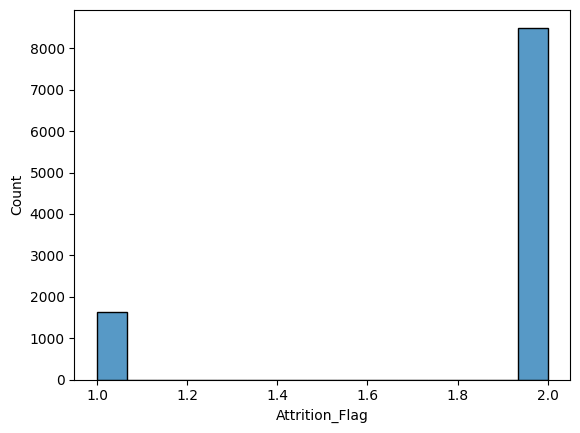

In [56]:
sns.histplot(data = data, x='Attrition_Flag')

<Axes: xlabel='Card_Category', ylabel='Count'>

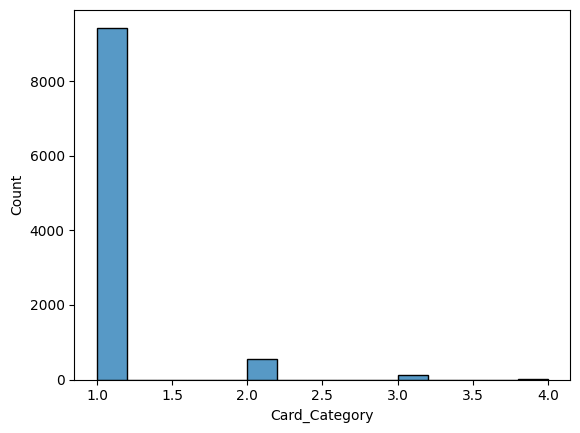

In [57]:
sns.histplot(data = data, x='Card_Category')

<Axes: xlabel='Total_Trans_Ct', ylabel='Count'>

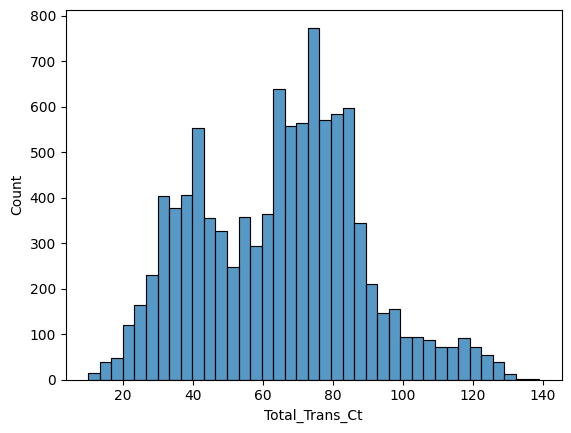

In [58]:
sns.histplot(data = data, x='Total_Trans_Ct')

In [59]:
data_clean = data[['Attrition_Flag', 'Card_Category', 'Total_Trans_Ct']]
data_clean

,Attrition_Flag,Card_Category,Total_Trans_Ct
0,2,1,42
1,2,1,33
2,2,1,20
3,2,1,20
4,2,1,28
...,...,...,...
10122,2,1,117
10123,1,1,69
10124,1,1,60
10125,1,1,62


In [60]:
data_clean.describe()

,Attrition_Flag,Card_Category,Total_Trans_Ct
count,10127.000000,10127.000000,10127.000000
mean,1.839340,1.083638,64.858695
std,0.367235,0.333784,23.472570
min,1.000000,1.000000,10.000000
25%,2.000000,1.000000,45.000000
50%,2.000000,1.000000,67.000000
75%,2.000000,1.000000,81.000000
max,2.000000,4.000000,139.000000


<Axes: >

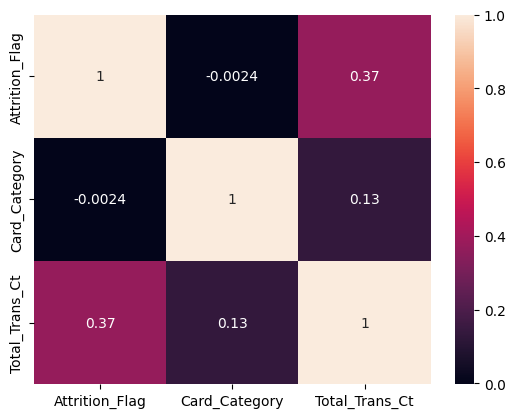

In [61]:
sns.heatmap( data_clean[['Attrition_Flag','Card_Category','Total_Trans_Ct']].corr(),annot=True)

#### Tratamiento de Outliers

### Método IQR

In [62]:
temp = pd.DataFrame()

for col in data_clean.columns:
    column = data_clean[col]
 
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)

    IQR = Q3 - Q1
    
    umbral_inferior = Q1 - 1.5 * IQR
    umbral_superior = Q3 + 1.5 * IQR

    data_clean[col + '_outliers'] = (column < umbral_inferior) | (column > umbral_superior)


    print(f'{Q1 =} {Q3=} {IQR =} {umbral_inferior = } {umbral_superior =}')

Q1 =2.0 Q3=2.0 IQR =0.0 umbral_inferior = 2.0 umbral_superior =2.0
Q1 =1.0 Q3=1.0 IQR =0.0 umbral_inferior = 1.0 umbral_superior =1.0
Q1 =45.0 Q3=81.0 IQR =36.0 umbral_inferior = -9.0 umbral_superior =135.0


C:\Users\143521\AppData\Local\Temp\ipykernel_14944\738748033.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\143521\AppData\Local\Temp\ipykernel_14944\738748033.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\143521\AppData\Local\Temp\ipykernel_14944\738748033.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [63]:
data_clean

,Attrition_Flag,Card_Category,Total_Trans_Ct,Attrition_Flag_outliers,Card_Category_outliers,Total_Trans_Ct_outliers
0,2,1,42,False,False,False
1,2,1,33,False,False,False
2,2,1,20,False,False,False
3,2,1,20,False,False,False
4,2,1,28,False,False,False
...,...,...,...,...,...,...
10122,2,1,117,False,False,False
10123,1,1,69,True,False,False
10124,1,1,60,True,False,False
10125,1,1,62,True,False,False


In [64]:
data_clean.groupby(by='Attrition_Flag_outliers').count()

,Attrition_Flag,Card_Category,Total_Trans_Ct,Card_Category_outliers,Total_Trans_Ct_outliers
Attrition_Flag_outliers,,,,,
False,8500,8500,8500,8500,8500
True,1627,1627,1627,1627,1627


In [65]:
data_clean.groupby(by='Card_Category_outliers').count()

,Attrition_Flag,Card_Category,Total_Trans_Ct,Attrition_Flag_outliers,Total_Trans_Ct_outliers
Card_Category_outliers,,,,,
False,9436,9436,9436,9436,9436
True,691,691,691,691,691


In [66]:
data_clean.groupby(by='Total_Trans_Ct_outliers').count()

,Attrition_Flag,Card_Category,Total_Trans_Ct,Attrition_Flag_outliers,Card_Category_outliers
Total_Trans_Ct_outliers,,,,,
False,10125,10125,10125,10125,10125
True,2,2,2,2,2


In [67]:
#data_noout =  data_clean[data_clean['Attrition_Flag_outliers'] == False]
#data_noout = data_noout[data_noout['Card_Category_outliers'] == False]
#data_noout = data_noout[data_noout['Total_Trans_Ct_outliers'] == False]
#data_noout.reset_index(drop=True)

In [68]:
#data_noout =  data_clean[data_clean['Contacts_Count_12_mon_outliers'] == False]

data_noout = data_clean[data_clean['Total_Trans_Ct_outliers'] == False]

data_noout.reset_index(drop=True)

,Attrition_Flag,Card_Category,Total_Trans_Ct,Attrition_Flag_outliers,Card_Category_outliers,Total_Trans_Ct_outliers
0,2,1,42,False,False,False
1,2,1,33,False,False,False
2,2,1,20,False,False,False
3,2,1,20,False,False,False
4,2,1,28,False,False,False
...,...,...,...,...,...,...
10120,2,1,117,False,False,False
10121,1,1,69,True,False,False
10122,1,1,60,True,False,False
10123,1,1,62,True,False,False


In [69]:
data_noout.describe()

,Attrition_Flag,Card_Category,Total_Trans_Ct
count,10125.000000,10125.000000,10125.000000
mean,1.839309,1.083654,64.844148
std,0.367264,0.333815,23.452054
min,1.000000,1.000000,10.000000
25%,2.000000,1.000000,45.000000
50%,2.000000,1.000000,67.000000
75%,2.000000,1.000000,81.000000
max,2.000000,4.000000,134.000000


<Axes: xlabel='Attrition_Flag', ylabel='Count'>

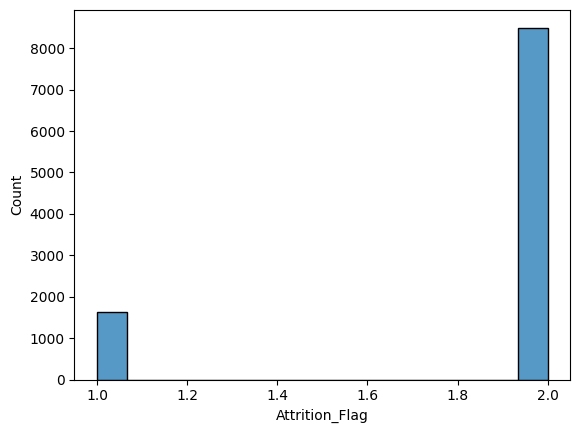

In [70]:
sns.histplot(data=data_noout, x='Attrition_Flag')

<Axes: xlabel='Card_Category', ylabel='Count'>

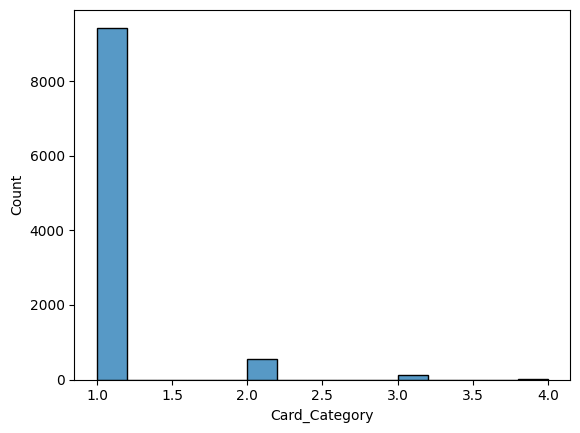

In [71]:
sns.histplot(data=data_noout, x='Card_Category')

<Axes: xlabel='Total_Trans_Ct', ylabel='Count'>

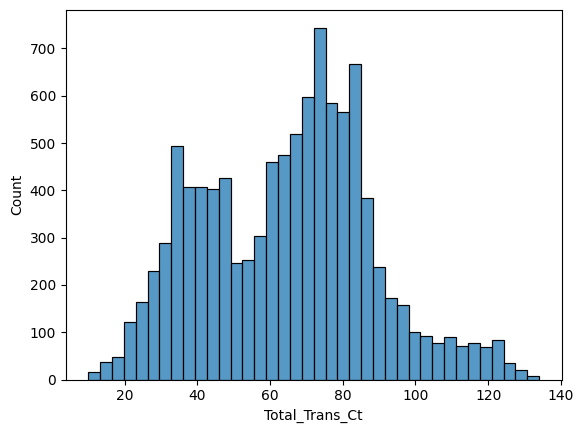

In [72]:
sns.histplot(data=data_noout, x='Total_Trans_Ct')

In [73]:
dfSummary(data_noout)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Attrition_Flag[int64],Mean (sd) : 1.8 (0.4)min < med < max:1.0 < 2.0 < 2.0IQR (CV) : 0.0 (5.0),2 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAABtklEQVR4nO3ZTYqDQBCG4apBRDfdiOBhPEQOm0N4GwntIkog6dnNZpj8dDJkvuF9tlpFL14U0XPOBvx1H+8+AHCP6t0HwP/h7q2Z1YXjp5zz+tNFQsVLuHvb9/0uhNCVzC/LcnD3/U+xEipepQ4hdOM4rjHG7ZHBlFIzTVM3z3NtZoSK3xdj3IZhOBaMttcu8jEFCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCdWtG9y9NbO6cP8p57wWzgJfrobq7m3f97sQQleyfFmWg7vviRXPuvVErUMI3TiOa4xxe2RxSqmZpqmb57k2M0LFU26++s3MYozbMAzHgv1twQzwDR9TkECokECokECokECokECokECokECokECokHDXn6mUUvPo4pRScz6fKzML7v7wwSAnXC6XqrSVW/d8AkonTn2ckm/eAAAAAElFTkSuQmCC"">",0(0.0%)
2,Card_Category[int64],Mean (sd) : 1.1 (0.3)min < med < max:1.0 < 1.0 < 4.0IQR (CV) : 0.0 (3.2),4 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAAB40lEQVR4nO3XsWrjQBRG4XsXIyQIM8gCPYz6tHnYtNvrbUQ8IsTegD3pttlkbY0S7N+cr9ZcbnHQSJ5zNuDW/br2AsAlNucecPfGzKrC+e85533hWeCv/4bq7k3XdU8hhLZk+DzPL+7+TKxY69wbtQohtMMw7GOMhyWDU0r1OI7tNE2VmREqVjl79ZuZxRgPfd+/FcxvCs4A/+BnChIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRI2117gp7h7Y2bVihHvOef9d+2Dde4yVHdvuq57CiG0pTPmeX5x92divQ13GaqZVSGEdhiGfYzxsPRwSqkex7GdpqkyM0K9AfcaqpmZxRgPfd+/FR5vvnWZC/HJ8rmLQk0p1UsHp5Tq4/G4MbPg7osXWymcTqdNyd5mV9293m63jzHGh9IBu93u1d1/m9nim+TK/uScv9z5A7pcYa2OZJr3AAAAAElFTkSuQmCC"">",0(0.0%)
3,Total_Trans_Ct[int64],Mean (sd) : 64.8 (23.5)min < med < max:10.0 < 67.0 < 134.0IQR (CV) : 36.0 (2.8),124 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACoklEQVR4nO3cQYriQBSA4VeTVqJCggi68wIDs3DpIeawc4RZeAJv4E4QiZjpYIyZxUyDDU63ViVjvcr/7YvO4kdS+l6buq4F8N2XZz8AcI+XZz9AiIwxAxHpWx4/1XX92uTzhIBQG2aMGUwmk+9Jkoxtzh8Oh70x5gexvkeozesnSTJeLpevaZoWjxzMsixerVbj3W7XFxFCvUKoLUnTtJhOp78sjg4af5gAcJmCCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQr8MvUPDoMlyeVy6TX9PF1HqDe4DJaUZRlXVfW1KIqfImLzEypuINTbrAdLNpvNeL1eD8/nc9TWw3URoX7AZrBkv98zVNICLlNQgVChAqFCBa/fUdk9whtvQ2X3CNe8DVXYPcIVn0MVEXaP8AeXKahAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBe+HUmxVVdUTkcQYY3OclWfPBBlqnue9siy/zefzKIqih0YERVh59lGQoZ5Op5c4joeLxaKYzWb7R8+z8uyfIEN9MxqNrGZZn7ny7PjKIhLoCk7QoWrj+soiEu4KTquhOi7nde5C4/rKEvIKTmuhui7ndflCY/vK8leQKzhtfqJaL+eJcKHBe62/o9ou5/E/nHCNX6agAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQrMowbGcfDa26FrQg2I6+C1z0PXhBoQl8Fr34euCTVAtoPXVVUl4um+FqFCRPzf1yJUiIj/+1qfhuqwoNe55bwQ+Lqv9WGoLgt6XV7OQ/M++0S1XtBjOa972vwO9653VJsFPZbzuqXt73C5TKERbX+He1eoWZbFj/xhEZHj8RiLiOR5Hm+32+H/PK/1b2t97uvzbfkNE7+x5o0/NZ4AAAAASUVORK5CYII="">",0(0.0%)
4,Attrition_Flag_outliers[bool],1. False2. True,"8,498 (83.9%)1,627 (16.1%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAABMUlEQVR4nO3bQWrDMBRF0adiQjORMAYvxovoYrsI7cYYa9CETNRByRL+swr3bOAHchNI8Eu9dwEOSdJd0u3qF4LLvXrvj8gD07IsXznnOfIIxtdaO1JK35HBTTnnedu2RynlGXUEYzvP87PWOu/7fpMUF5sklVKe67r+RB3Bv3CPPvARfQB4IzbYEBtsiA02xAYbYoMNscGG2GBDbLAhNtgQG2yIDTbEBhtigw2xwWaS/h6eu/qF4Dqu939qrR211lmGh+cwrtbaIekVeYPBC97CBy+JKR9cXN9s4Z8ajM8y5XPMxDC+8CmfayaG8bmmfPzSBX/qwofYYENssCE22BAbbIgNNsQGG2KDDbHBhthgQ2ywITbYEBtsiA02xAab8CkfM0G8WaZ8jpkYxsfgBTa/Cltq33c4jS0AAAAASUVORK5CYII="

In [74]:
data_noout = data_noout[['Attrition_Flag', 'Card_Category' , 'Total_Trans_Ct']]
data_noout

,Attrition_Flag,Card_Category,Total_Trans_Ct
0,2,1,42
1,2,1,33
2,2,1,20
3,2,1,20
4,2,1,28
...,...,...,...
10122,2,1,117
10123,1,1,69
10124,1,1,60
10125,1,1,62


In [75]:

lambdas = []

nombre = []

df_new = pd.DataFrame()

 

for x in data_noout.columns:

    df, lamb = stats.boxcox(data_noout[x])

    lambdas.append(lamb)

    nombre.append(x)

    df_new[x] = df

In [76]:
df_lambdas = {
    'nombre' : nombre,
    'lambda' : lambdas
}

df_lambdas = pd.DataFrame(df_lambdas)
df_lambdas

,nombre,lambda
0,Attrition_Flag,8.859066
1,Card_Category,-18.754364
2,Total_Trans_Ct,0.757056


In [77]:
df_new.describe()

,Attrition_Flag,Card_Category,Total_Trans_Ct
count,10125.000000,10125.000000,10125.000000
mean,43.897738,0.003639,29.367208
std,19.208745,0.013447,8.622808
min,0.000000,0.000000,6.228760
25%,52.302259,0.000000,22.253780
50%,52.302259,0.000000,30.543973
75%,52.302259,0.000000,35.466688
max,52.302259,0.053321,52.531945


In [78]:
data_bc = df_new

In [79]:
data_bc.describe()

,Attrition_Flag,Card_Category,Total_Trans_Ct
count,10125.000000,10125.000000,10125.000000
mean,43.897738,0.003639,29.367208
std,19.208745,0.013447,8.622808
min,0.000000,0.000000,6.228760
25%,52.302259,0.000000,22.253780
50%,52.302259,0.000000,30.543973
75%,52.302259,0.000000,35.466688
max,52.302259,0.053321,52.531945


<Axes: xlabel='Attrition_Flag', ylabel='Count'>

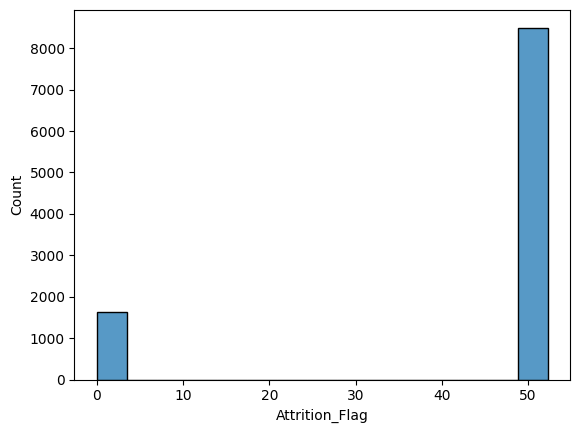

In [80]:
sns.histplot(data_bc,x= 'Attrition_Flag')

<Axes: xlabel='Card_Category', ylabel='Count'>

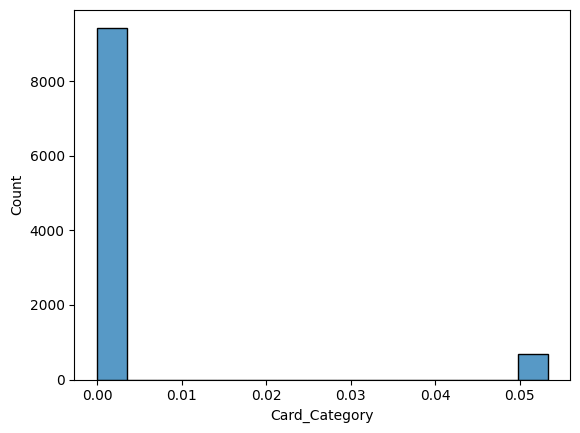

In [81]:
sns.histplot(data_bc,x= 'Card_Category')

<Axes: xlabel='Total_Trans_Ct', ylabel='Count'>

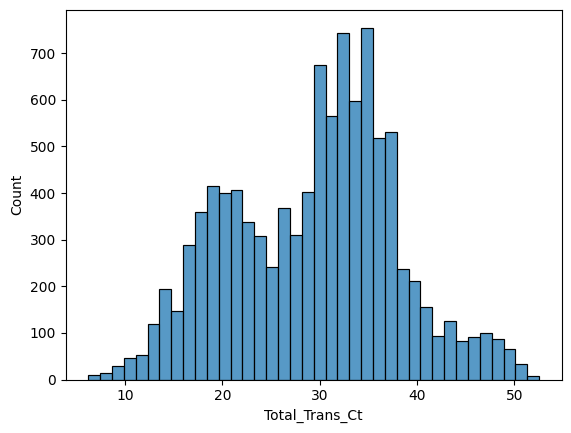

In [82]:
sns.histplot(data_bc,x= 'Total_Trans_Ct')

#### Modelo K-means

In [83]:
inercia = []
ks = []

for k in range(1,60):
    modelo_iterado = KMeans(n_clusters = k, random_state = 5)
    modelo_iterado.fit(data_bc)
    inercia.append(modelo_iterado.inertia_)
    ks.append(k)

c:\Users\143521\.conda\envs\StatisticalLearningII\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\143521\.conda\envs\StatisticalLearningII\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\143521\.conda\envs\StatisticalLearningII\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\143521\.conda\envs\StatisticalLearningII\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\143

In [84]:
codo = {
    'inercia': inercia,
    'k': ks
}

codo = pd.DataFrame(codo)

<Axes: xlabel='k', ylabel='inercia'>

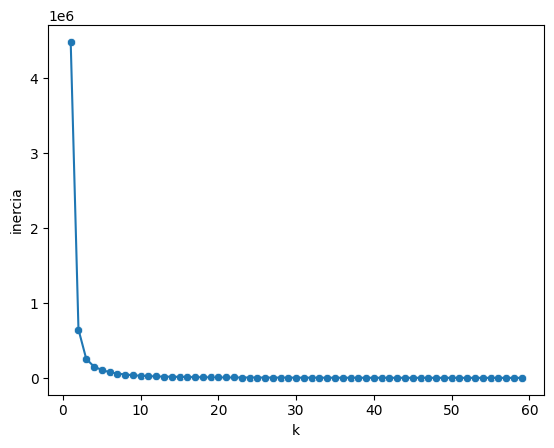

In [85]:
sns.scatterplot(data=codo,x='k',y='inercia',markers=True)
sns.lineplot(data=codo, x='k', y='inercia',)

In [86]:
modelo = KMeans(n_clusters=4,random_state = 10)
modelo.fit(data_bc)

c:\Users\143521\.conda\envs\StatisticalLearningII\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=4, random_state=10)

In [87]:
data_noout['cluster'] = modelo.labels_
data_noout

,Attrition_Flag,Card_Category,Total_Trans_Ct,cluster
0,2,1,42,2
1,2,1,33,2
2,2,1,20,2
3,2,1,20,2
4,2,1,28,2
...,...,...,...,...
10122,2,1,117,3
10123,1,1,69,0
10124,1,1,60,0
10125,1,1,62,0


In [88]:
data_noout.groupby(by='cluster').count()

,Attrition_Flag,Card_Category,Total_Trans_Ct
cluster,,,
0,1627,1627,1627
1,4514,4514,4514
2,2036,2036,2036
3,1948,1948,1948


In [89]:
data_bc.describe()

,Attrition_Flag,Card_Category,Total_Trans_Ct
count,10125.000000,10125.000000,10125.000000
mean,43.897738,0.003639,29.367208
std,19.208745,0.013447,8.622808
min,0.000000,0.000000,6.228760
25%,52.302259,0.000000,22.253780
50%,52.302259,0.000000,30.543973
75%,52.302259,0.000000,35.466688
max,52.302259,0.053321,52.531945


In [90]:
data_noout.describe()

,Attrition_Flag,Card_Category,Total_Trans_Ct,cluster
count,10125.000000,10125.000000,10125.000000,10125.000000
mean,1.839309,1.083654,64.844148,1.425185
std,0.367264,0.333815,23.452054,0.975023
min,1.000000,1.000000,10.000000,0.000000
25%,2.000000,1.000000,45.000000,1.000000
50%,2.000000,1.000000,67.000000,1.000000
75%,2.000000,1.000000,81.000000,2.000000
max,2.000000,4.000000,134.000000,3.000000


In [91]:
data_noout.groupby(by='cluster').agg(['min','mean','max'])

Attrition_Flag          Card_Category               Total_Trans_Ct  \
                   min mean max           min      mean max            min   
cluster                                                                      
0                    1  1.0   1             1  1.085433   4             10   
1                    2  2.0   2             1  1.059149   3             53   
2                    2  2.0   2             1  1.051081   4             11   
3                    2  2.0   2             1  1.172998   4             84   

                         
              mean  max  
cluster                  
0        44.933620   94  
1        70.547851   83  
2        36.856582   52  
3        97.508727  134

# Caracteristicas de clusters

Card_Category
* 1 = Blue
* 2 = Silver
* 3 = Gold
* 4 = Platinum

Attrition_Flag
* 1 = Clientes Retirados
* 2 = Clientes Existentes

Descripciones Categoria Cluster
* 0 = Cliente retirado, Categoria de tarjeta, Total Transacciones         #### Retirado
* 1 = Cliente Existente, Categoria de tarjeta, Total Transacciones        #### Poco Riesgo de retirarse
* 2 = Cliente Existente, Categoria de tarjeta, Total Transacciones        #### Alto Riesgo de retirarse
* 3 = Cliente Existente, Categoria de tarjeta, Total Transacciones        #### Sin Riesgo de retirarse


<Axes: xlabel='Card_Category', ylabel='Total_Trans_Ct'>

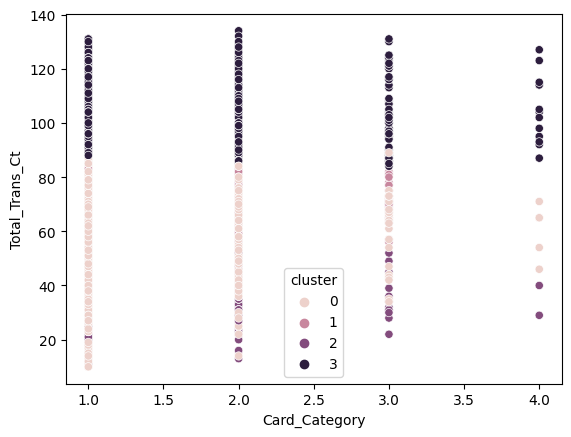

In [92]:
#sns.scatterplot(data=data_noout,x='Total_Trans_Ct', y='Card_Category', hue='cluster')
sns.scatterplot(data=data_noout,x='Card_Category', y='Total_Trans_Ct', hue='cluster')

<Axes: xlabel='Total_Trans_Ct', ylabel='Attrition_Flag'>

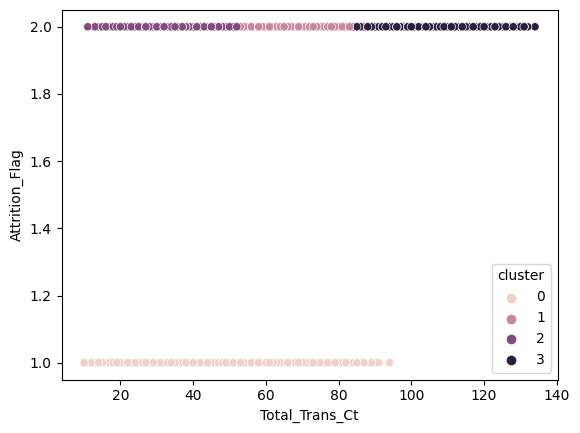

In [93]:
#sns.scatterplot(data=data_noout,x='Attrition_Flag', y='Contacts_Count_12_mon', hue='cluster')
sns.scatterplot(data=data_noout,x='Total_Trans_Ct', y='Attrition_Flag', hue='cluster')

In [94]:
fig = px.scatter_3d(data_noout, x = 'Card_Category',
y = 'Total_Trans_Ct',
z = 'Attrition_Flag',
color = 'cluster')

fig.show()

#### Conclusion:

* A los clientes que se les debe de realizar una campaña de marketing especial ya que tienen un alto riesgo de dejar de ser clientes son a los del cluster 2. 
* No importa la categoria que posean los clientes del cluster 2 tienen un alto riesgo de dejar de ser clientes.
* Cuando los clientes tienen menos de 52 consumos con su tc al año son los mas propensos a dejar de ser clientes.